In [ ]:
import pandas as pd
df=pd.read_excel("/content/EV charging Dataset.xlsx")
print(df.shape)
print(df.columns)
df.head()

(867473, 27)
Index(['State', 'City', 'Station Name', 'User ID', 'Vehicle Model',
       'Charger Type', 'User Type', 'Vehicle Avg Energy Consumed (kWh)',
       'Vehicle Avg Charging Duration (hrs)', 'Avg Battery Capacity (kWh)',
       'Avg Charging Cost (USD)', 'Count of Station', 'Sum of Level1 charger',
       'Sum of Level2 charger', 'Sum of DC Fast Charger',
       'User Type Avg Charging Duration (hrs)',
       'User Type Sum Energy Consumed (kWh)', 'Energy Cost Efficiency',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Day of Week', 'Time of Day',
       'Charging Start Time', 'Charging End Time', 'Battery Capacity (kWh)',
       'ZIP'],
      dtype='object')


,State,City,Station Name,User ID,Vehicle Model,Charger Type,User Type,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),...,Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Day of Week,Time of Day,Charging Start Time,Charging End Time,Battery Capacity (kWh),ZIP
0,AZ,Chicago,CLARENDALE SC STATION 1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,...,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60641.0
1,IL,Chicago,1000 LAKE SHORE 1000 LSD,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,...,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60611.0
2,IL,Chicago,110 UPPERWACKER STATION 2,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,...,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
3,IL,Chicago,110 UPPERWACKER STATION 3,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,...,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
4,IL,Chicago,155 N WACKER DR P1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,...,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0


In [ ]:
print(df.isnull().sum())

State                                        1
City                                         0
Station Name                                 1
User ID                                      1
Vehicle Model                                0
Charger Type                                 0
User Type                                    0
Vehicle Avg Energy Consumed (kWh)            0
Vehicle Avg Charging Duration (hrs)          0
Avg Battery Capacity (kWh)                   0
Avg Charging Cost (USD)                      0
Count of Station                             0
Sum of Level1 charger                    96135
Sum of Level2 charger                        0
Sum of DC Fast Charger                       0
User Type Avg Charging Duration (hrs)        0
User Type Sum Energy Consumed (kWh)          0
Energy Cost Efficiency                       0
Charging Cost (USD)                          1
State of Charge (Start %)                    1
State of Charge (End %)                      1
Day of Week  

In [ ]:
pd.set_option('display.max_columns', None)
columns_to_inspect_nulls = ['State', 'Sum of Level1 charger', 'ZIP']

print(f"\nRows with null values in {columns_to_inspect_nulls}:")
print(df[df[columns_to_inspect_nulls].isnull().any(axis=1)].head())


Rows with null values in ['State', 'Sum of Level1 charger', 'ZIP']:
     State         City      Station Name   User ID Vehicle Model  \
2778    CA  Los Angeles  8601 Balboa Blvd  User_377        BMW i3   
3435    CA  Los Angeles  8601 Balboa Blvd   User_20        BMW i3   
4092    CA  Los Angeles  8601 Balboa Blvd  User_828        BMW i3   
4749    CA  Los Angeles  8601 Balboa Blvd  User_372        BMW i3   
5406    CA  Los Angeles  8601 Balboa Blvd   User_89        BMW i3   

     Charger Type               User Type  Vehicle Avg Energy Consumed (kWh)  \
2778      Level 2  Long-Distance Traveler                          42.578471   
3435      Level 2  Long-Distance Traveler                          42.578471   
4092      Level 2  Long-Distance Traveler                          42.578471   
4749      Level 2  Long-Distance Traveler                          42.578471   
5406      Level 2  Long-Distance Traveler                          42.578471   

      Vehicle Avg Charging Duration

In [ ]:
columns_to_check_for_nulls = [
    'State',
    'Station Name',
    'User ID',
    'Sum of Level1 charger',
    'Charging Cost (USD)',
    'State of Charge (Start %)',
    'State of Charge (End %)',
    'Day of Week',
    'Time of Day',
    'Charging Start Time',
    'Charging End Time',
    'Battery Capacity (kWh)',
    'ZIP'
]
df_cleaned = df.dropna(subset=columns_to_check_for_nulls).copy()
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# To confirm no more nulls in the selected columns
print("\nNull values in selected columns after dropping:")
print(df_cleaned[columns_to_check_for_nulls].isnull().sum())

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df_cleaned.head(10))

Original DataFrame shape: (867473, 27)
Cleaned DataFrame shape: (771040, 27)

Null values in selected columns after dropping:
State                        0
Station Name                 0
User ID                      0
Sum of Level1 charger        0
Charging Cost (USD)          0
State of Charge (Start %)    0
State of Charge (End %)      0
Day of Week                  0
Time of Day                  0
Charging Start Time          0
Charging End Time            0
Battery Capacity (kWh)       0
ZIP                          0
dtype: int64

First 5 rows of the cleaned DataFrame:
  State     City                  Station Name   User ID Vehicle Model  \
0    AZ  Chicago       CLARENDALE SC STATION 1  User_420        BMW i3   
1    IL  Chicago      1000 LAKE SHORE 1000 LSD  User_420        BMW i3   
2    IL  Chicago     110 UPPERWACKER STATION 2  User_420        BMW i3   
3    IL  Chicago     110 UPPERWACKER STATION 3  User_420        BMW i3   
4    IL  Chicago            155 N WACKER DR P1  

In [ ]:
print(df_cleaned.dtypes)

State                                            object
City                                             object
Station Name                                     object
User ID                                          object
Vehicle Model                                    object
Charger Type                                     object
User Type                                        object
Vehicle Avg Energy Consumed (kWh)               float64
Vehicle Avg Charging Duration (hrs)             float64
Avg Battery Capacity (kWh)                      float64
Avg Charging Cost (USD)                         float64
Count of Station                                  int64
Sum of Level1 charger                           float64
Sum of Level2 charger                             int64
Sum of DC Fast Charger                            int64
User Type Avg Charging Duration (hrs)           float64
User Type Sum Energy Consumed (kWh)               int64
Energy Cost Efficiency                          

In [ ]:
df_cleaned['ZIP'] = df_cleaned['ZIP'].astype('Int64')
print("The New data type of 'ZIP' column is:",df_cleaned['ZIP'].dtype)
print(df['ZIP'].dtype) # The old df without cleaning null values

The New data type of 'ZIP' column is: Int64
float64


In [ ]:
# Filter rows where the 'State' column is 'AZ'
#az_state_rows = df_cleaned[df_cleaned['State'] == 'AZ'] ---> This is just if you want to view the rows with state AZ
#print("Rows where State is 'AZ':")
#print(az_state_rows.head())
#---------------------------------------------------------------

# Find rows with Chicago city and state not IL
df_cleaned[df_cleaned['City'] == 'Chicago']['State'].value_counts()

# Replace 'AZ' with 'IL' where city is Chicago
df_cleaned.loc[(df_cleaned['City'] == 'Chicago') & (df_cleaned['State'] == 'AZ'), 'State'] = 'IL'

df_cleaned.head()


,State,City,Station Name,User ID,Vehicle Model,Charger Type,User Type,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Day of Week,Time of Day,Charging Start Time,Charging End Time,Battery Capacity (kWh),ZIP
0,IL,Chicago,CLARENDALE SC STATION 1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5.0,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60641
1,IL,Chicago,1000 LAKE SHORE 1000 LSD,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5.0,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60611
2,IL,Chicago,110 UPPERWACKER STATION 2,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5.0,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606
3,IL,Chicago,110 UPPERWACKER STATION 3,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5.0,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606
4,IL,Chicago,155 N WACKER DR P1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5.0,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606


In [ ]:
# Check for duplicates
print(df_cleaned.duplicated().sum())

# Remove duplicates
#df = df.drop_duplicates()

0


In [ ]:
#df_cleaned.to_csv("ev_cleaned_data.csv", index=False)

In [ ]:
print(df_cleaned.head(10))
print(df_cleaned.shape)

  State     City                  Station Name   User ID Vehicle Model  \
0    IL  Chicago       CLARENDALE SC STATION 1  User_420        BMW i3   
1    IL  Chicago      1000 LAKE SHORE 1000 LSD  User_420        BMW i3   
2    IL  Chicago     110 UPPERWACKER STATION 2  User_420        BMW i3   
3    IL  Chicago     110 UPPERWACKER STATION 3  User_420        BMW i3   
4    IL  Chicago            155 N WACKER DR P1  User_420        BMW i3   
5    IL  Chicago   175 W JACKSON 175 W JACKSON  User_420        BMW i3   
6    IL  Chicago  222 N LaSalle Parking Garage  User_420        BMW i3   
7    IL  Chicago     225 W WACKER 225 W WACKER  User_420        BMW i3   
8    IL  Chicago     300 E. Randolph - Unit #1  User_420        BMW i3   
9    IL  Chicago       300 E. Randolph Unit #2  User_420        BMW i3   

      Charger Type      User Type  Vehicle Avg Energy Consumed (kWh)  \
0  DC Fast Charger  Casual Driver                          45.933193   
1  DC Fast Charger  Casual Driver        

In [ ]:
df_cleaned.to_csv("ev_cleaned_data.csv", index=False)

In [ ]:
import pandas as pd
ev = pd.read_csv('/content/ev_cleaned_data.csv')
pd.set_option('display.max_columns', None)
ev.head()

,State,City,Station Name,User ID,Vehicle Model,Charger Type,User Type,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Day of Week,Time of Day,Charging Start Time,Charging End Time,Battery Capacity (kWh),ZIP
0,IL,Chicago,CLARENDALE SC STATION 1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60641.0
1,IL,Chicago,1000 LAKE SHORE 1000 LSD,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60611.0
2,IL,Chicago,110 UPPERWACKER STATION 2,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
3,IL,Chicago,110 UPPERWACKER STATION 3,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
4,IL,Chicago,155 N WACKER DR P1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0


In [ ]:
ev.shape               # Rows and columns
ev.info()              # Data types and nulls
ev.describe()          # Summary of numerical columns
ev.columns.tolist()    # List of all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771040 entries, 0 to 771039
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   State                                  771040 non-null  object 
 1   City                                   771040 non-null  object 
 2   Station Name                           771040 non-null  object 
 3   User ID                                771040 non-null  object 
 4   Vehicle Model                          771040 non-null  object 
 5   Charger Type                           771040 non-null  object 
 6   User Type                              771040 non-null  object 
 7   Vehicle Avg Energy Consumed (kWh)      771040 non-null  float64
 8   Vehicle Avg Charging Duration (hrs)    771040 non-null  float64
 9   Avg Battery Capacity (kWh)             771040 non-null  float64
 10  Avg Charging Cost (USD)                771040 non-null  

['State',
 'City',
 'Station Name',
 'User ID',
 'Vehicle Model',
 'Charger Type',
 'User Type',
 'Vehicle Avg Energy Consumed (kWh)',
 'Vehicle Avg Charging Duration (hrs)',
 'Avg Battery Capacity (kWh)',
 'Avg Charging Cost (USD)',
 'Count of Station',
 'Sum of Level1 charger',
 'Sum of Level2 charger',
 'Sum of DC Fast Charger',
 'User Type Avg Charging Duration (hrs)',
 'User Type Sum Energy Consumed (kWh)',
 'Energy Cost Efficiency',
 'Charging Cost (USD)',
 'State of Charge (Start %)',
 'State of Charge (End %)',
 'Day of Week',
 'Time of Day',
 'Charging Start Time',
 'Charging End Time',
 'Battery Capacity (kWh)',
 'ZIP']

In [ ]:
#ev['City'].value_counts()
#ev['Vehicle Model'].value_counts()
#ev['Charger Type'].value_counts()
#The above code doesent print (only the last lint returns)

# Print value counts for 'City'
print("--- City Value Counts ---")
print(ev['City'].value_counts())

# Add a separator for clarity
print("\n" + "="*30 + "\n") # Prints a line of '=' characters for visual separation

# Print value counts for 'Vehicle Model'
print("--- Vehicle Model Value Counts ---")
print(ev['Vehicle Model'].value_counts())

# Add another separator
print("\n" + "="*30 + "\n")

# Print value counts for 'Charger Type'
print("--- Charger Type Value Counts ---")
print(ev['Charger Type'].value_counts())

--- City Value Counts ---
City
Los Angeles      460944
San Francisco    141768
Houston          100084
Chicago           68244
Name: count, dtype: int64


--- Vehicle Model Value Counts ---
Vehicle Model
Chevy Bolt       162061
Hyundai Kona     156164
BMW i3           155876
Tesla Model 3    150502
Nissan Leaf      146437
Name: count, dtype: int64


--- Charger Type Value Counts ---
Charger Type
Level 1            269991
Level 2            264535
DC Fast Charger    236514
Name: count, dtype: int64


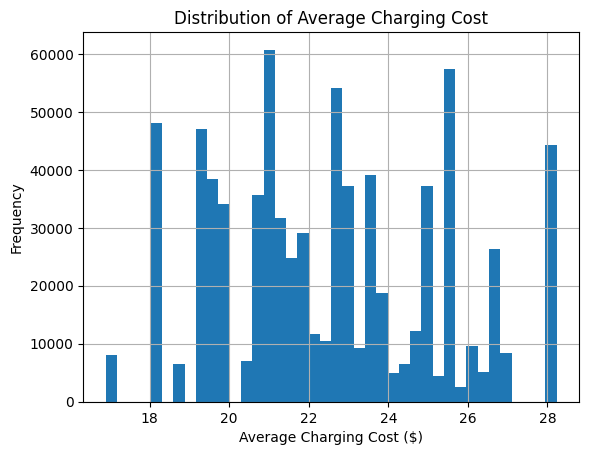

In [ ]:
import matplotlib.pyplot as plt
# ... (your df definition) ...
ev['Avg Charging Cost (USD)'].hist(bins=40)
plt.title('Distribution of Average Charging Cost') # Add a title for clarity
plt.xlabel('Average Charging Cost ($)')
plt.ylabel('Frequency')
plt.show() # Display the plot

In [ ]:
# Avg Charging cost for each charger type
print(ev.groupby('Charger Type')['Charging Cost (USD)'].mean())
print("\n" + "="*30 + "\n")
# Existing demand for charger types
print(ev['Charger Type'].value_counts())

Charger Type
DC Fast Charger    23.715961
Level 1            21.395939
Level 2            22.501447
Name: Charging Cost (USD), dtype: float64


Charger Type
Level 1            269991
Level 2            264535
DC Fast Charger    236514
Name: count, dtype: int64


In [ ]:
# Top 5 States by Total Energy consuming (High demand regions)
ev.groupby('State')['Vehicle Avg Energy Consumed (kWh)'].sum().sort_values(ascending=False)

,Vehicle Avg Energy Consumed (kWh)
State,
CA,2.504581e+07
TX,4.417976e+06
IL,2.965902e+06
LA,1.231441e+04
MI,1.109359e+04


In [ ]:
# Top 10 most frequent charging start times (Peak demand times)
ev['Charging Start Time'].value_counts().head(10)

,count
Charging Start Time,
2024-02-12 07:00:00,1552
2024-02-15 18:00:00,1552
2024-02-13 14:00:00,1552
2024-01-17 04:00:00,1552
2024-02-02 14:00:00,1552
2024-01-25 11:00:00,1552
2024-01-22 17:00:00,1552
2024-01-11 07:00:00,1552
2024-02-21 03:00:00,1552


In [ ]:
# Energy consumed by each vehicle model
ev.groupby('Vehicle Model')['Vehicle Avg Energy Consumed (kWh)'].mean()

,Vehicle Avg Energy Consumed (kWh)
Vehicle Model,
BMW i3,41.077063
Chevy Bolt,41.252936
Hyundai Kona,40.262184
Nissan Leaf,43.774564
Tesla Model 3,44.298149


In [ ]:
ev['User Type'].value_counts()

,count
User Type,
Commuter,283250
Long-Distance Traveler,261548
Casual Driver,226242


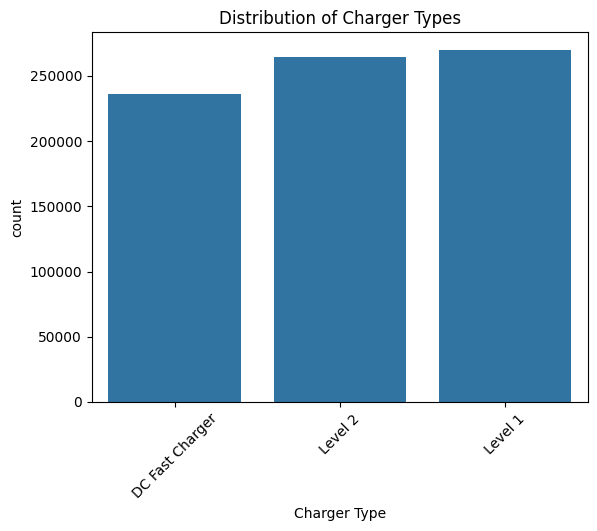

/tmp/ipython-input-1201443374.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ev, x='Vehicle Model', y='Avg Charging Cost (USD)', ci=None)


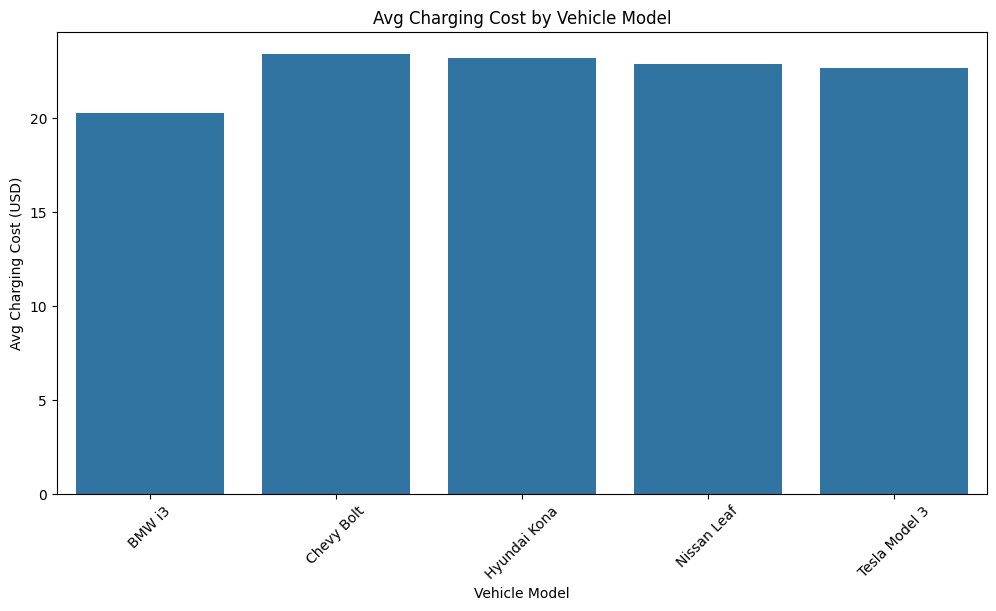

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Charger Types
sns.countplot(data=ev, x='Charger Type')
plt.title('Distribution of Charger Types')
plt.xticks(rotation=45)
plt.show()

# Avg Charging Cost by Vehicle Model
plt.figure(figsize=(12,6))
sns.barplot(data=ev, x='Vehicle Model', y='Avg Charging Cost (USD)', ci=None)
plt.xticks(rotation=45)
plt.title('Avg Charging Cost by Vehicle Model')
plt.show()


In [ ]:
ev.describe() #For numerical columns

,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Battery Capacity (kWh),ZIP
count,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000
mean,42.090034,2.275405,74.676424,22.486886,1111.384997,40.535651,3309.255852,266.626458,2.275405,3749.872359,0.541603,22.486886,50.036160,74.307088,74.676424,86618.296240
std,5.188563,0.298741,4.754901,2.770809,558.245346,36.764787,1806.212148,65.350631,0.098795,362.195272,0.091320,10.689473,24.057892,16.802019,21.056823,9750.101348
min,33.608293,1.280451,61.697732,16.898223,283.000000,5.000000,657.000000,126.000000,2.102656,3105.000000,0.380862,0.234317,2.325959,7.604224,1.532807,9048.000000
25%,37.526280,2.092828,71.956734,20.786606,542.000000,29.000000,1397.000000,183.000000,2.193956,3450.000000,0.468151,13.283976,29.942229,62.006475,62.000000,90007.000000
50%,42.578471,2.238780,74.696498,22.308112,1566.000000,29.000000,4783.000000,312.000000,2.211078,3621.000000,0.534274,22.337922,49.323140,75.079750,75.000000,90035.000000
75%,45.498297,2.439957,77.724623,24.960312,1566.000000,29.000000,4783.000000,312.000000,2.354186,3984.000000,0.593066,31.098591,69.644443,86.904400,85.000000,91367.000000
max,54.564889,3.042094,87.355276,28.231461,1566.000000,116.000000,4783.000000,312.000000,2.497286,4233.000000,0.767178,69.407743,152.489761,177.708666,193.003074,99067.000000


In [ ]:
ev.describe(include='all') #for both obj and string

,State,City,Station Name,User ID,Vehicle Model,Charger Type,User Type,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Day of Week,Time of Day,Charging Start Time,Charging End Time,Battery Capacity (kWh),ZIP
count,771040,771040,771040,771040,771040,771040,771040,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040.000000,771040,771040,771040,771040,771040.000000,771040.000000
unique,5,4,2733,1065,5,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,1065,1057,NaN,NaN
top,CA,Los Angeles,Walgreens,User_1016,Chevy Bolt,Level 1,Commuter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,Evening,2024-02-12 07:00:00,2024-02-07 06:52:00,NaN,NaN
freq,602151,460944,1574,1552,162061,269991,283250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128246,207133,1552,1934,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.090034,2.275405,74.676424,22.486886,1111.384997,40.535651,3309.255852,266.626458,2.275405,3749.872359,0.541603,22.486886,50.036160,74.307088,NaN,NaN,NaN,NaN,74.676424,86618.296240
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.188563,0.298741,4.754901,2.770809,558.245346,36.764787,1806.212148,65.350631,0.098795,362.195272,0.091320,10.689473,24.057892,16.802019,NaN,NaN,NaN,NaN,21.056823,9750.101348
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.608293,1.280451,61.697732,16.898223,283.000000,5.000000,657.000000,126.000000,2.102656,3105.000000,0.380862,0.234317,2.325959,7.604224,NaN,NaN,NaN,NaN,1.532807,9048.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.526280,2.092828,71.956734,20.786606,542.000000,29.000000,1397.000000,183.000000,2.193956,3450.000000,0.468151,13.283976,29.942229,62.006475,NaN,NaN,NaN,NaN,62.000000,90007.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.578471,2.238780,74.696498,22.308112,1566.000000,29.000000,4783.000000,312.000000,2.211078,3621.000000,0.534274,22.337922,49.323140,75.079750,NaN,NaN,NaN,NaN,75.000000,90035.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.498297,2.439957,77.724623,24.960312,1566.000000,29.000000,4783.000000,312.000000,2.354186,3984.000000,0.593066,31.098591,69.644443,86.904400,NaN,NaN,NaN,NaN,85.000000,91367.000000


In [ ]:
print("Average charging cost by charger type")
print(ev.groupby('Charger Type')['Avg Charging Cost (USD)'].mean())

print('\nAverage energy consumed by user type')
print(ev.groupby('User Type')['Vehicle Avg Energy Consumed (kWh)'].mean())

print("\nAverage cost by user type")
print(ev.groupby('User Type')['Avg Charging Cost (USD)'].mean())

print("\nAverage energy consumed by charger type")
print(ev.groupby('Charger Type')['Vehicle Avg Energy Consumed (kWh)'].mean())


Average charging cost by charger type
Charger Type
DC Fast Charger    23.715961
Level 1            21.395939
Level 2            22.501447
Name: Avg Charging Cost (USD), dtype: float64

Average energy consumed by user type
User Type
Casual Driver             41.820448
Commuter                  42.254515
Long-Distance Traveler    42.145100
Name: Vehicle Avg Energy Consumed (kWh), dtype: float64

Average cost by user type
User Type
Casual Driver             22.591281
Commuter                  22.574754
Long-Distance Traveler    22.301423
Name: Avg Charging Cost (USD), dtype: float64

Average energy consumed by charger type
Charger Type
DC Fast Charger    40.242587
Level 1            40.678422
Level 2            45.182516
Name: Vehicle Avg Energy Consumed (kWh), dtype: float64


In [ ]:
ev.corr(numeric_only=True)

,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Battery Capacity (kWh),ZIP
Vehicle Avg Energy Consumed (kWh),1.000000,0.071493,-0.388216,0.101641,-0.157513,-0.046175,-0.155263,-0.093141,-0.017305,-0.004117,-0.652556,0.026346,-0.036190,-0.008748,-0.087664,-0.141371
Vehicle Avg Charging Duration (hrs),0.071493,1.000000,0.019754,0.180694,-0.111114,0.189943,-0.114367,-0.113204,0.132991,-0.010075,0.087141,0.046838,-0.076913,0.021926,0.004461,0.070749
Avg Battery Capacity (kWh),-0.388216,0.019754,1.000000,-0.254969,0.093330,0.159811,0.089745,0.077565,0.120330,0.004689,0.060529,-0.066090,-0.011174,0.009775,0.225813,0.219072
Avg Charging Cost (USD),0.101641,0.180694,-0.254969,1.000000,0.008409,-0.093892,0.009619,-0.036066,-0.080196,0.001260,0.680925,0.259209,-0.018459,0.029923,-0.057575,-0.107426
Count of Station,-0.157513,-0.111114,0.093330,0.008409,1.000000,-0.275806,0.999761,0.846816,-0.335992,0.473677,0.112815,0.002180,0.059280,-0.047981,0.021075,0.551157
Sum of Level1 charger,-0.046175,0.189943,0.159811,-0.093892,-0.275806,1.000000,-0.295923,-0.437672,0.574360,-0.235747,-0.038477,-0.024338,-0.043734,0.035855,0.036087,0.551237
Sum of Level2 charger,-0.155263,-0.114367,0.089745,0.009619,0.999761,-0.295923,1.000000,0.854029,-0.345829,0.476865,0.112178,0.002493,0.059967,-0.048435,0.020266,0.537638
Sum of DC Fast Charger,-0.093141,-0.113204,0.077565,-0.036066,0.846816,-0.437672,0.854029,1.000000,-0.342314,0.505166,0.035119,-0.009349,0.064579,-0.043278,0.017515,0.470215
User Type Avg Charging Duration (hrs),-0.017305,0.132991,0.120330,-0.080196,-0.335992,0.574360,-0.345829,-0.342314,1.000000,-0.665631,-0.045219,0.001909,-0.040938,0.056489,-0.020836,0.213934
User Type Sum Energy Consumed (kWh),-0.004117,-0.010075,0.004689,0.001260,0.473677,-0.235747,0.476865,0.505166,-0.665631,1.000000,-0.001483,-0.017918,0.067028,-0.028468,0.049204,0.235062


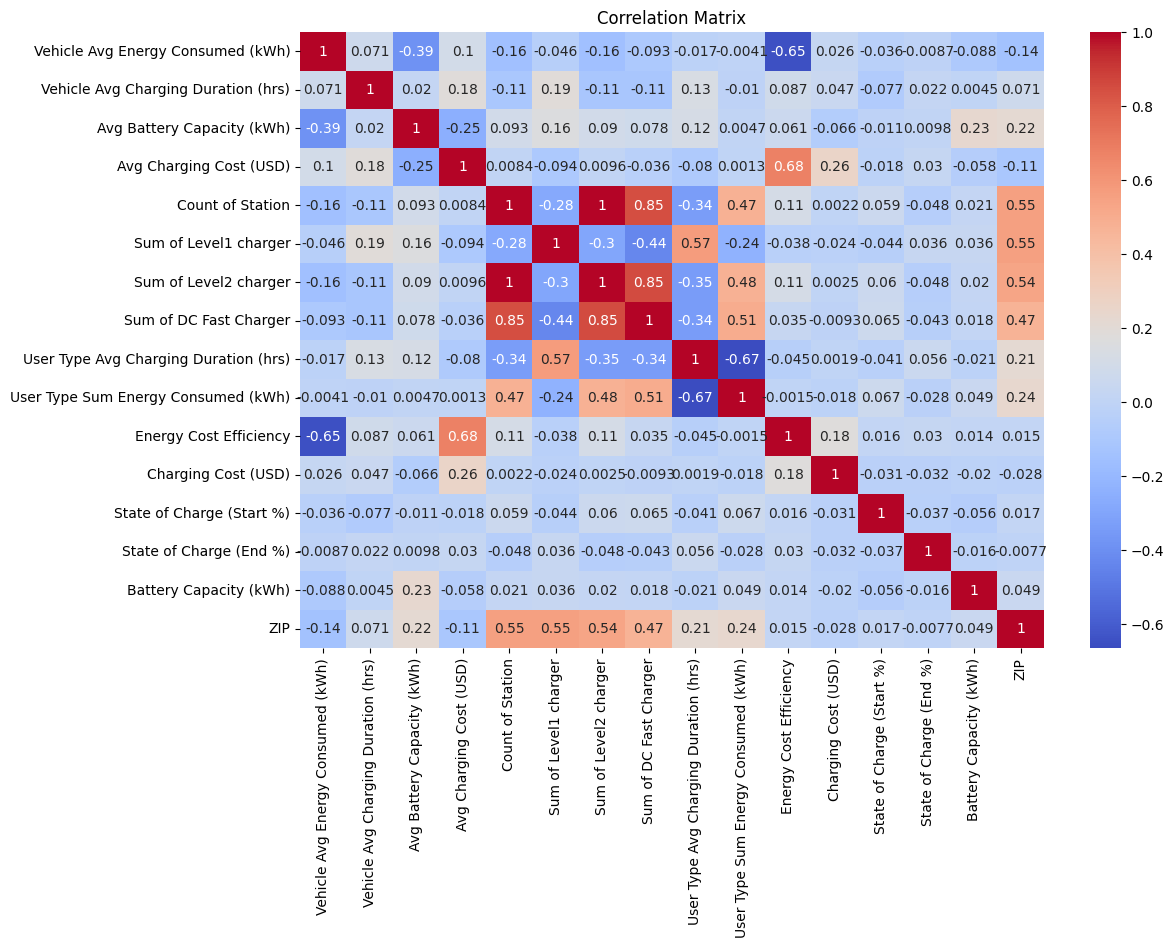

In [ ]:
# Correlation matrix
corr_matrix = ev.corr(numeric_only=True)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

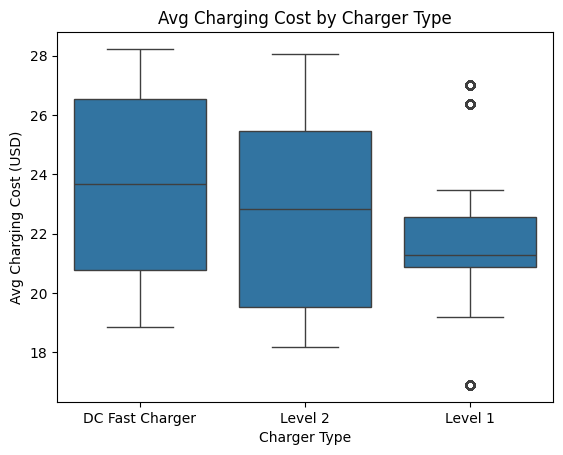

In [ ]:
# Boxplot to check outliers in Avg Charging Cost
sns.boxplot(data=ev, x='Charger Type', y='Avg Charging Cost (USD)')
plt.title("Avg Charging Cost by Charger Type")
plt.show()

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=6d62f53783e42047b72696904dab99e17ba39bb82eb8adadb6f23e53bf59b5fb
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [ ]:
import pandasql as psql
#import pandas as pd
psql.sqldf("SELECT * FROM ev LIMIT 5", locals())

,State,City,Station Name,User ID,Vehicle Model,Charger Type,User Type,Vehicle Avg Energy Consumed (kWh),Vehicle Avg Charging Duration (hrs),Avg Battery Capacity (kWh),Avg Charging Cost (USD),Count of Station,Sum of Level1 charger,Sum of Level2 charger,Sum of DC Fast Charger,User Type Avg Charging Duration (hrs),User Type Sum Energy Consumed (kWh),Energy Cost Efficiency,Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Day of Week,Time of Day,Charging Start Time,Charging End Time,Battery Capacity (kWh),ZIP
0,IL,Chicago,CLARENDALE SC STATION 1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60641.0
1,IL,Chicago,1000 LAKE SHORE 1000 LSD,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60611.0
2,IL,Chicago,110 UPPERWACKER STATION 2,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
3,IL,Chicago,110 UPPERWACKER STATION 3,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0
4,IL,Chicago,155 N WACKER DR P1,User_420,BMW i3,DC Fast Charger,Casual Driver,45.933193,2.145708,76.333333,23.134271,283,5,657,126,2.281088,3477,0.50365,7.269854,45.885528,90.422396,Thursday,Night,2024-01-18 11:00:00,2024-01-18 12:46:00,85.0,60606.0


In [ ]:
#!pip install pandasql
#import pandasql as psql
# Top 5 cities with highest energy consumption
topcities = psql.sqldf("""
SELECT City, SUM(`Vehicle Avg Energy Consumed (kWh)`) AS total_energy_kwh
FROM ev
GROUP BY City
ORDER BY total_energy_kwh DESC
""")
print(topcities)

            City  total_energy_kwh
0    Los Angeles      1.911197e+07
1  San Francisco      5.957257e+06
2        Houston      4.417976e+06
3        Chicago      2.965902e+06


In [ ]:
# Average charging cost per charger type
avgchargingcost = psql.sqldf("""
SELECT `Charger Type`, AVG(`Charging Cost (USD)`) AS avg_cost_usd
FROM ev
GROUP BY `Charger Type`;
           """)
print(avgchargingcost)

      Charger Type  avg_cost_usd
0  DC Fast Charger     23.715961
1          Level 1     21.395939
2          Level 2     22.501447


In [ ]:
# CREATING CHARGING DURATION COLUMN
# Make sure the columns are in datetime format first, just in case
ev['Charging End Time'] = pd.to_datetime(ev['Charging End Time'])
ev['Charging Start Time'] = pd.to_datetime(ev['Charging Start Time'])

# Calculate the difference and convert it to total minutes
# .dt.total_seconds() gets the duration in seconds
# Dividing by 60 converts it to minutes
ev['charging_duration_minutes'] = (ev['Charging End Time'] - ev['Charging Start Time']).dt.total_seconds() / 60

# Now you have a new column named 'charging_duration_minutes'
# You can view a few rows to confirm it worked
print(ev[['Charging Start Time', 'Charging End Time', 'charging_duration_minutes']].head())

  Charging Start Time   Charging End Time  charging_duration_minutes
0 2024-01-18 11:00:00 2024-01-18 12:46:00                      106.0
1 2024-01-18 11:00:00 2024-01-18 12:46:00                      106.0
2 2024-01-18 11:00:00 2024-01-18 12:46:00                      106.0
3 2024-01-18 11:00:00 2024-01-18 12:46:00                      106.0
4 2024-01-18 11:00:00 2024-01-18 12:46:00                      106.0


In [ ]:
#Average charging duration for each vehicle model
vm_charging_dur = psql.sqldf("""
SELECT `Vehicle Model`, AVG(charging_duration_minutes) AS avg_duration_min
FROM ev
GROUP BY `Vehicle Model`
ORDER BY avg_duration_min DESC;
""")
print(vm_charging_dur)

   Vehicle Model  avg_duration_min
0     Chevy Bolt        135.991454
1   Hyundai Kona        134.017667
2         BMW i3        133.876107
3    Nissan Leaf        132.709459
4  Tesla Model 3        132.304601


In [ ]:
# This is the another method which can be used for the above code
# Average charging duration for each vehicle model
query = """
SELECT `Vehicle Model`, AVG(charging_duration_minutes) AS avg_duration
FROM ev
GROUP BY `Vehicle Model`
ORDER BY avg_duration DESC
LIMIT 10;
"""

result = psql.sqldf(query,locals())

print(result)

   Vehicle Model  avg_duration
0     Chevy Bolt    135.991454
1   Hyundai Kona    134.017667
2         BMW i3    133.876107
3    Nissan Leaf    132.709459
4  Tesla Model 3    132.304601


In [ ]:
# Count of charging stations per state
psql.sqldf("""
SELECT `City`,`State`, COUNT(DISTINCT `Station Name`) AS total_stations
FROM ev
GROUP BY `City`,`State`
ORDER BY total_stations DESC;
""")#problem found in city and state mismatch

,City,State,total_stations
0,Los Angeles,CA,1551
1,San Francisco,CA,533
2,Houston,TX,373
3,Chicago,IL,280
4,Los Angeles,LA,1
5,San Francisco,MI,1


In [ ]:
# Correct the state for 'Los Angeles' from 'LA' to 'CA'
ev.loc[ev['City'] == 'Los Angeles', 'State'] = 'CA'

# Correct the state for 'San Francisco' from 'MI' to 'CA'
ev.loc[ev['City'] == 'San Francisco', 'State'] = 'CA'

# You can then verify the changes directly on the 'ev' DataFrame:
print("Value counts after correcting 'San Francisco' and 'Los Angeles':")
print(ev[ev['City'].isin(['San Francisco', 'Los Angeles'])]['State'].value_counts())

Value counts after correcting 'San Francisco' and 'Los Angeles':
State
CA    602712
Name: count, dtype: int64


In [ ]:
# Problem Solved
# Count of charging stations per state
station_count = psql.sqldf("""
SELECT `City`,`State`, COUNT(DISTINCT `Station Name`) AS total_stations
FROM ev
GROUP BY `City`,`State`
ORDER BY total_stations DESC;
""")
print(station_count)

            City State  total_stations
0    Los Angeles    CA            1552
1  San Francisco    CA             534
2        Houston    TX             373
3        Chicago    IL             280


In [ ]:
# Charger usage pattern by city and charger type
charger_usage = psql.sqldf("""
SELECT `City`, `Charger Type`, COUNT(*) AS usage_count
FROM ev
GROUP BY `City`, `Charger Type`
ORDER BY usage_count DESC;
""")
print(charger_usage)

             City     Charger Type  usage_count
0     Los Angeles          Level 1       164512
1     Los Angeles          Level 2       164512
2     Los Angeles  DC Fast Charger       131920
3   San Francisco          Level 2        49941
4   San Francisco          Level 1        47793
5   San Francisco  DC Fast Charger        44034
6         Houston  DC Fast Charger        37436
7         Houston          Level 1        33998
8         Houston          Level 2        28650
9         Chicago          Level 1        23688
10        Chicago  DC Fast Charger        23124
11        Chicago          Level 2        21432


In [ ]:
# 1. Avg energy consumption by vehicle model
query = """
SELECT `Vehicle Model`,
       AVG(`Vehicle Avg Energy Consumed (kWh)`) AS avg_energy_kwh
FROM ev
GROUP BY `Vehicle Model`
ORDER BY avg_energy_kwh DESC;
"""
vm_consumption = psql.sqldf(query, locals())
print(vm_consumption)

   Vehicle Model  avg_energy_kwh
0  Tesla Model 3       44.298149
1    Nissan Leaf       43.774564
2     Chevy Bolt       41.252936
3         BMW i3       41.077063
4   Hyundai Kona       40.262184


In [ ]:
# 2. Avg charging duration for each charger type
query = """
SELECT `Charger Type`,
       AVG(`Vehicle Avg Charging Duration (hrs)`) AS avg_duration_hrs
FROM ev
GROUP BY `Charger Type`
ORDER BY avg_duration_hrs DESC;
"""
chargertype_dur = psql.sqldf(query, locals())
print(chargertype_dur)

      Charger Type  avg_duration_hrs
0          Level 2          2.323068
1  DC Fast Charger          2.300717
2          Level 1          2.206532


In [ ]:
# 3. Highest energy consumption by user type
query = """
SELECT `User Type`,
       `User Type Sum Energy Consumed (kWh)` AS total_energy_kwh
FROM ev
GROUP BY `User Type`
ORDER BY total_energy_kwh DESC;
"""
usertype_energy = psql.sqldf(query, locals())
print(usertype_energy)

                User Type  total_energy_kwh
0  Long-Distance Traveler              3984
1                Commuter              3594
2           Casual Driver              3477


In [ ]:
# 4. City with the highest avg charging cost
query = """
SELECT `City`,
       AVG(`Charging Cost (USD)`) AS avg_cost_usd
FROM ev
GROUP BY `City`
ORDER BY avg_cost_usd DESC;
"""
city_avgcost = psql.sqldf(query, locals())
print(city_avgcost)

            City  avg_cost_usd
0        Chicago     23.716254
1    Los Angeles     22.541434
2        Houston     22.094322
3  San Francisco     21.994874


In [ ]:
# 5. Compare cost across user type and charger type
query = """
SELECT `User type`,
       `Charger Type`,
       AVG(`Charging Cost (USD)`) AS avg_cost_usd
FROM ev
GROUP BY `User Type`, `Charger Type`
ORDER BY avg_cost_usd DESC;
"""
ut_and_ct_cost = psql.sqldf(query, locals())
print(ut_and_ct_cost)

                User Type     Charger Type  avg_cost_usd
0           Casual Driver  DC Fast Charger     24.909884
1                Commuter  DC Fast Charger     23.888345
2                Commuter          Level 2     23.309878
3  Long-Distance Traveler          Level 2     22.571078
4  Long-Distance Traveler  DC Fast Charger     22.554482
5           Casual Driver          Level 1     21.535988
6                Commuter          Level 1     21.433824
7  Long-Distance Traveler          Level 1     21.235293
8           Casual Driver          Level 2     21.129297


In [ ]:
# 6. Which day of the week has the highest EV charging demand
query = """
SELECT `Day of Week` AS weekday,
       COUNT(*) AS total_sessions
FROM ev
GROUP BY weekday
ORDER BY total_sessions DESC;
"""
dayofweek = psql.sqldf(query, locals())
print(dayofweek)

     weekday  total_sessions
0     Monday          128246
1   Saturday          122347
2    Tuesday          119079
3     Sunday          111150
4  Wednesday          102790
5     Friday           97759
6   Thursday           89669


In [ ]:
# 7. Which time of the day has the highest EV charging demand

# First, ensure datetime format
ev['Charging Start Time'] = pd.to_datetime(ev['Charging Start Time'])

# Create hour column
ev['hour'] = ev['Charging Start Time'].dt.hour

# Map hour to time range
def map_time_range(h):
    if 5 <= h < 12:
        return 'Morning'
    elif 12 <= h < 17:
        return 'Afternoon'
    elif 17 <= h < 21:
        return 'Evening'
    else:
        return 'Night'

ev['time_range'] = ev['hour'].apply(map_time_range)

# SQL query to count by hour and range
query = """
SELECT hour,
       time_range,
       COUNT(*) AS total_sessions
FROM ev
GROUP BY hour, time_range
ORDER BY total_sessions DESC;
"""
timeofday = psql.sqldf(query, locals())
print(timeofday)

    hour time_range  total_sessions
0      3      Night           39357
1     16  Afternoon           39254
2     14  Afternoon           39089
3     20    Evening           38453
4      8    Morning           37862
5     10    Morning           37506
6     22      Night           37133
7     11    Morning           36241
8     21      Night           36072
9     15  Afternoon           34434
10     4      Night           34175
11     5    Morning           32210
12    13  Afternoon           31839
13    17    Evening           31684
14    19    Evening           30170
15     1      Night           30101
16    12  Afternoon           28935
17    23      Night           26837
18     0      Night           26502
19    18    Evening           26206
20     9    Morning           25805
21     7    Morning           25464
22     2      Night           24926
23     6    Morning           20785


In [ ]:
#just to view the columns list in the dataset
print(ev.columns.tolist())

['State', 'City', 'Station Name', 'User ID', 'Vehicle Model', 'Charger Type', 'User Type', 'Vehicle Avg Energy Consumed (kWh)', 'Vehicle Avg Charging Duration (hrs)', 'Avg Battery Capacity (kWh)', 'Avg Charging Cost (USD)', 'Count of Station', 'Sum of Level1 charger', 'Sum of Level2 charger', 'Sum of DC Fast Charger', 'User Type Avg Charging Duration (hrs)', 'User Type Sum Energy Consumed (kWh)', 'Energy Cost Efficiency', 'Charging Cost (USD)', 'State of Charge (Start %)', 'State of Charge (End %)', 'Day of Week', 'Time of Day', 'Charging Start Time', 'Charging End Time', 'Battery Capacity (kWh)', 'ZIP', 'charging_duration_minutes', 'hour', 'time_range']


In [ ]:
import pandas as pd

print("Saving master dataset to its own file...")
ev.to_excel("master_corrected_data.xlsx", index=False)
print("Master dataset saved successfully.")


print("Saving analysis results to a separate file...")
with pd.ExcelWriter("analysis_results.xlsx") as writer:

    topcities.to_excel(writer, sheet_name="Top 5 Cities Energy", index=False)
    avgchargingcost.to_excel(writer, sheet_name="Avg Cost by Charger", index=False)
    vm_charging_dur.to_excel(writer, sheet_name="VM Avg Dur", index=False)
    station_count.to_excel(writer, sheet_name="Station Count per State", index=False)
    charger_usage.to_excel(writer, sheet_name="Charger Usage by City", index=False)
    vm_consumption.to_excel(writer, sheet_name="Energy Consumed by VM", index=False)
    chargertype_dur.to_excel(writer, sheet_name="Charger Type Dur", index=False)
    usertype_energy.to_excel(writer, sheet_name="Energy by User Type", index=False)
    city_avgcost.to_excel(writer, sheet_name="Highest Cost City", index=False)
    ut_and_ct_cost.to_excel(writer, sheet_name="Cost by User & Charger", index=False)
    dayofweek.to_excel(writer, sheet_name="Busy Day of Week", index=False)
    timeofday.to_excel(writer, sheet_name="Busy Time of Day", index=False)

print("Analysis results saved successfully.")

Saving master dataset to its own file...
Master dataset saved successfully.
Saving analysis results to a separate file...
Analysis results saved successfully.


In [ ]:
ev.to_csv('master_corrected_data.csv', index=False)

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

Total rows: 771040. Training rows: 616832. Holdout Test rows: 154208
--------------------------------------------------
🔍 Running RandomizedSearchCV...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 9, 'iterations': 300, 'depth': 8}
🚀 Training Final Model on Full Data...
0:	learn: 10.1381729	total: 1.63s	remaining: 8m 8s
100:	learn: 2.4076361	total: 3m 23s	remaining: 6m 41s
200:	learn: 1.2968334	total: 6m 49s	remaining: 3m 21s
299:	learn: 0.9554416	total: 10m 1s	remaining: 0us

⭐ Running Final Model Evaluation on Holdout Set... ⭐
MAE (Avg Error): $0.5034
RMSE (Large Error Penalty): $0.7242
R^2 (Variance Explained): 0.9954


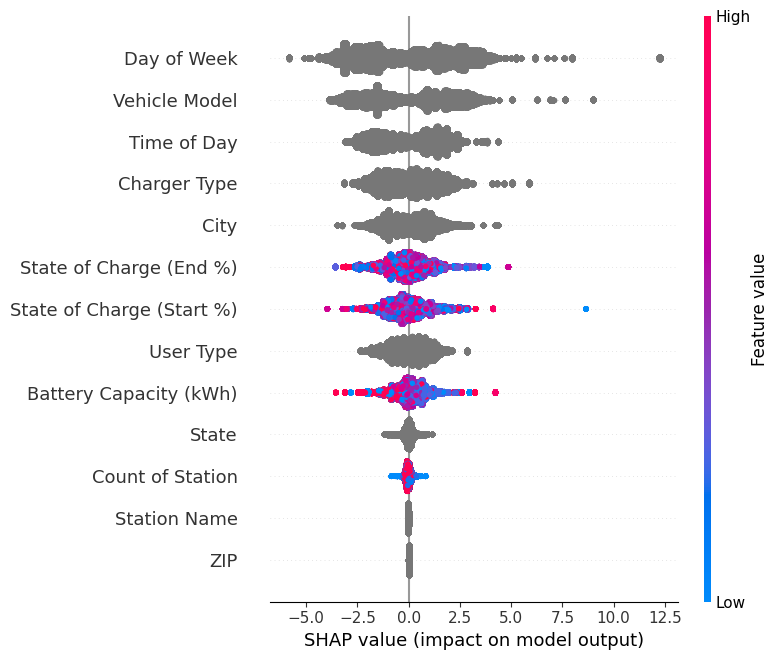

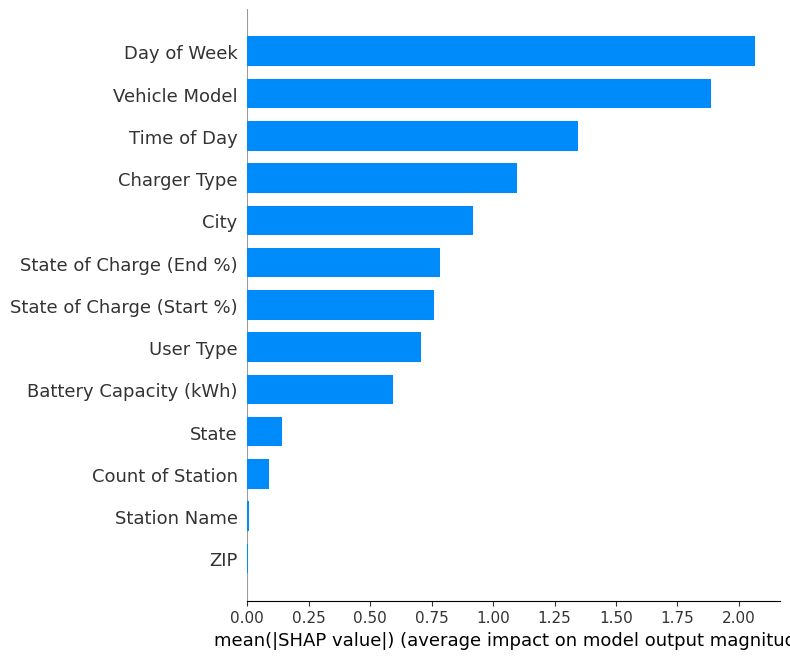

In [ ]:
# ==============================
# 📌 Step 1: Imports
# ==============================
!pip install catboost --quiet
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# ==============================
# 📌 Step 2: Prepare Data
# ==============================
# Assuming dataset is cleaned
mcd = pd.read_csv("/content/master_corrected_data.csv")
#X = mcd.drop(columns=['Charging Cost (USD)', 'Avg Charging Cost (USD)','Energy Cost Efficiency'])
X = mcd.drop(columns=[
    'Charging Cost (USD)', 'Avg Charging Cost (USD)', 'Energy Cost Efficiency',
    'Vehicle Avg Energy Consumed (kWh)', 'Vehicle Avg Charging Duration (hrs)',
    'Avg Battery Capacity (kWh)', 'User Type Sum Energy Consumed (kWh)',
    'User Type Avg Charging Duration (hrs)',
    'Charging Start Time', 'Charging End Time', # <-- REMOVES BAD CATEGORICALS
    'Sum of Level1 charger', 'Sum of Level2 charger', 'Sum of DC Fast Charger','User ID'
])
y = mcd['Charging Cost (USD)']

# 🎯 CRITICAL FIX: Ensure all categorical columns are strings (object type)
for col in ['State', 'City', 'ZIP', 'Vehicle Model', 'Charger Type', 'User Type',
            'Day of Week', 'Time of Day', 'Station Name']:
    # Check if the column exists in X before trying to convert it
    if col in X.columns:
        # Convert to string, and importantly, fill any potential NaNs (nulls) with 'Unknown'
        # This handles the CatBoost requirement that NaN/float values must be strings if they are categorical
        X[col] = X[col].astype(str).fillna('Unknown')

# Detect categorical columns
#categorical_features = X.select_dtypes(include=['object']).columns.tolist()   #
#print("Categorical Features:", categorical_features)         #
# 🎯 CRITICAL: Explicitly define the clean categorical features
categorical_features = [
    'State', 'City', 'ZIP', 'Vehicle Model', 'Charger Type',
    'User Type', 'Day of Week', 'Time of Day', 'Station Name'
]

# Split data into a training set (80%) and a final, untouched testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"Total rows: {len(X)}. Training rows: {len(X_train)}. Holdout Test rows: {len(X_test)}")
print("-" * 50)

# ==============================
# 📌 Step 3: Time-based Cross Validation
# ==============================
tscv = TimeSeriesSplit(n_splits=3)   #

# ==============================
# 📌 Step 4: Hyperparameter Tuning (RandomizedSearchCV)
# ==============================
param_dist = {
    'iterations': [300, 500, 800],        # Lowered from 3000 → saves time
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 7, 9]
}

cat_model = CatBoostRegressor(
    cat_features=categorical_features,
    verbose=0,
    early_stopping_rounds=50,
    random_seed=42
)

random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_iter=5,     #   # Try 5 random combinations instead of full grid
    n_jobs=-1,
    random_state=42
)

print("🔍 Running RandomizedSearchCV...")
random_search.fit(X, y)

print("✅ Best Parameters:", random_search.best_params_)
#print("✅ Best CV Score:", random_search.best_score_)     #

# ==============================
# 📌 Step 5: Train Final Model with Best Params
# ==============================
best_params = random_search.best_params_

final_model = CatBoostRegressor(
    **best_params,
    cat_features=categorical_features,
    verbose=100,
    early_stopping_rounds=50,
    random_seed=42
)

print("🚀 Training Final Model on Full Data...")
final_model.fit(X, y)

final_model.save_model("catboost_ev_ML_model.cbm")

print("\n⭐ Running Final Model Evaluation on Holdout Set... ⭐")

# 1. Predict on the dedicated test set (X_test)
final_predictions = final_model.predict(X_test)

# 2. Calculate the metrics
mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"MAE (Avg Error): ${mae:,.4f}")
print(f"RMSE (Large Error Penalty): ${rmse:,.4f}")
print(f"R^2 (Variance Explained): {r2:,.4f}")

# ==============================
# 📌 Step 6: Explainability with SHAP
# ==============================
explainer = shap.TreeExplainer(final_model)
shap_values = explainer(X_test)

# Summary Plot (distribution)
shap.summary_plot(shap_values, X_test)

# Bar Plot (mean absolute importance)
plt.figure(figsize=(15, 10))           #
shap.summary_plot(shap_values, X_test, plot_type="bar")


Generating Final Feature Importance Plot...


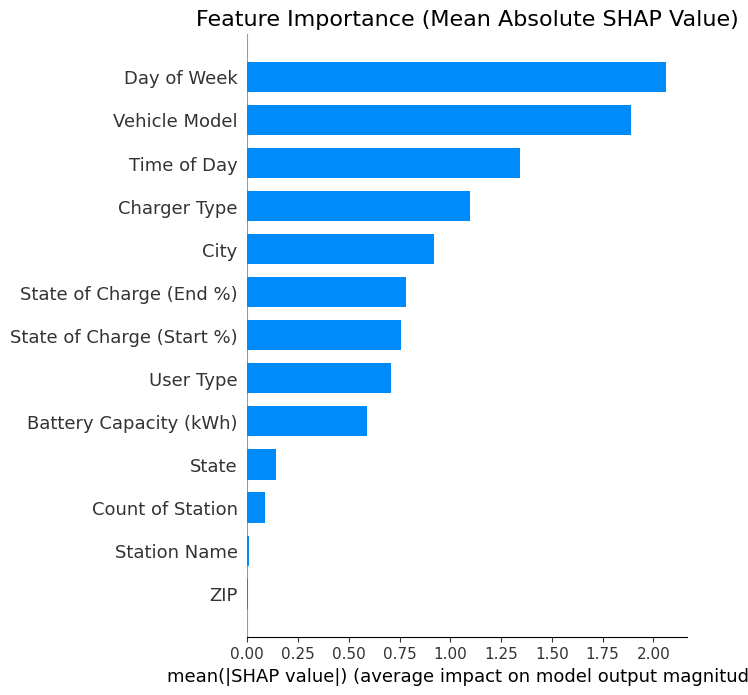

In [ ]:
# ==============================
# 📌 Step 6: Explainability with SHAP (Final Robust Plotting)
# ==============================
# ... (calculation of explainer, shap_values, X_test) ...

print("Generating Final Feature Importance Plot...")

# 1. Start by creating a tall figure (using the recommended height)
plt.figure(figsize=(12, 12))

# 2. Plot the SHAP values, but REMOVE the 'ax=ax' argument
# The plot will automatically draw onto the figure created above.
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="bar",
    show=False # Keep show=False to allow margin adjustments
)

# 3. CRITICAL: Manually adjust the left margin to make room for long feature names
# We push the plot area right, giving space for the text labels on the left.
plt.subplots_adjust(left=0.35, right=0.9, top=0.95, bottom=0.05)

# 4. Final display cleanup
plt.title("Feature Importance (Mean Absolute SHAP Value)", fontsize=16)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import joblib

# We must recalculate SHAP values using the test data's features.
explainer = shap.TreeExplainer(final_model)
shap_values = explainer(X_test)

# --- 1. SHAP Raw Values and Features (Using Test Data) ---
# Saving the raw SHAP values and the corresponding features from the test set
# Raw SHAP values for each row/feature.
np.save("shap_values_TEST.npy", shap_values.values)      # SHAP contributions
X_test.to_csv("shap_features_TEST.csv", index=False)     # Matching features


# --- 2. Mean Feature Importance (Calculated from Test Data) ---
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP|": shap_importance
}).sort_values(by="Mean |SHAP|", ascending=False)
# Ranked feature mean importance per feature (for Power BI).
shap_df.to_csv("shap_feature_importance.csv", index=False)


# --- 3. Actual vs. Predicted Performance (Using Test Data) ---
# Use the final_predictions variable calculated in Step 6
final_predictions = final_model.predict(X_test)
results = pd.DataFrame({
    "Actual Cost": y_test,         # Use the actual costs from the test set
    "Predicted Cost": final_predictions # Use the predictions made on X_test
})
# Model performance (for Power BI dashboard).
results.to_csv("predictions_vs_actual.csv", index=False)